Artificial Neural network (ANN)

The structure of the neural networks contains the input layer, hidden layers and output layer. So normally the information will be received by the input signal and then it will transferred to the hidden layers where all information will be processed. Finally, after processing all information, output will be released by output layer. This is how simple artificial neural networks work.

Convolution Neural networks are ANNs (artificial neural networks). CNNs (convolutional neural networks) are made of up neurons that are connected to one another by weighted branches (weight); the training parameters of the networks are once again the weight and bias. In CNNs, the connection pattern between neurons is inspired by the structure of the visual cortex in the animal world. The individual neurons that are present in this part of the brain (visual cortex) respond to certain stimuli in a narrow region of the observation, called the receptive field. The receptive fields of different neurons are partially overlapped to cover the entire field of vision. The response of a signle neuron to stimuli taking pace in its receptive field can be mathematically approximated by a convolution operation.

CNNs contains input layers, convolution layers, pooling layers fully connected layers and output layers.


Convolution layer.

This is the main type of layer; the use of one or more of these layers in CNNs are essentials. Convolution layers have neurons which are organized in 3 dimensions, such as width, height and depth.

During the forward propagation, each filer which is spatially small (along the width and height dimensions) and extends over the entire depth of the input volumne to which it is applied, is translated or convoluted with the width and height of the input volumn producing a 2 dimensional activation map (or feature map) for that filer. As the filer moved alon ghte input area, a scalar product operation is performed between the values of the filer and those of the input portion to which it is applied.

The goal of the network is to learn activated filters in the presence of some specific type of functionality in a given spatial region of the input. The queuing of all these feature maps (for all filers), and the depth dimension form the putput volumn of a convolution layer. Each element of this volumn can be interpreted as the output of a neuron that observes only a small region of the input which shares its parameters with the other neurons that in the same feature map. This is because these values all come from the application of the same filter.

**Pooling layers**


These layers are inserted into a network to reduce the spatial size (width and height) of current representations, as well as volumnes in a specific network stage; This serves to reduce the number of parameters and the computational time of the network. It also monitors overfitting. A pooling layer operates on each depth slice of the input volumn independently to resize it spatially.

For each feature obtained in the convolutional step, a matrix will be bilt and we will find the maximum in each chosen matrix to shrink the entire input. The steps will be:


1.   Pick a window size (2 or 3)

1.   Pick a stride moving range of pixels (usually 2)
2.   Slide the window across the filtered images


2.   For each window, the maximum value will be chosen.


A pooling lyers will divide input into regions and selects a single representative value (max pooling and average pooling).

The max pool layer will select the maximum numnber of features that have been detected by the convolution layers that precede it. The output will check whether a hypothetical feature is present in a region of the previous layers or not, but not exactly where. Hence, the idea is to allow the successive layers to worn on larger selection of data. Max pooling allows for faster convergence rates, and therefore, allow us to select higher invariant features to improve the generalization performance.


There are 2 main advantages of using pooling layer. The first advantage will be to reduce the calculation of subsequent layers adn the second advantage will be increase the robustness of the features with respect to spatial position.



We will use the MNIST digits data set and we can access to this dataset via keras library

In [8]:
# Implement basic CNN
# First step is we need to import and load all neccessary libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [9]:
# The second step is we need to load the data and reshape the images in a 4-dimensional matrix
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28,28,1)
# Padding the images by 2 pixels
x_train=np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test=np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

The MNIST dataset includes training and test datasets. These datasets are composed of the grayscale images (integer arrays with shape (num_sample, 28,28)) and the labels (integers in the range 0-9). Images are padded by 2 pixels because the input images were 32x32.


The next step is model parameters need to be set and the deph of the image (number of channels) will be 1. The reason for that is these images are grayscale.

In [10]:
image_width= x_train[0].shape[0]
image_height= x_train[0].shape[1]
num_channels = 1 # grayscale = 1 channel
seed= 98
np.random.seed(seed)
tf.random.set_seed(seed)

The next is training and test data variables will be declared and there will be various batch sizes for traing and evaluation. These values can be changed depending on the physical memory that is avaible for training and evaluating.

In [11]:
batch_size = 100
evaluation_size = 500
epochs=300
eval_every=5

 our images need to be normalized to change the values of all pixels to a common scale



In [12]:
x_train = x_train/255
x_test= x_test/255

We will declare our model. We will have the feature extractor module composed of 2 convolutional/ReLu/max pooling layers followed by the classifier with fully connected layers. Also, to get the classifier to work, we flatten the output of the feature extractor module so we can use it in the classifier.We will use a softmaxt activation function at the last layer of the classifier. Softmax will turn numeric output (logits) into probabilities that sum to one.

In [13]:
input_data = tf.keras.Input(dtype=tf.float32, shape=(image_width,image_height, num_channels), name="INPUT")
# First Conv-ReLU-MaxPool Layer
conv1 = tf.keras.layers.Conv2D(filters=6,
                               kernel_size=5,
                               padding='VALID',
                               activation="relu",
                               name="C1")(input_data)
max_pool1 = tf.keras.layers.MaxPool2D(pool_size=2,
                                      strides=2, 
                                      padding='SAME',
                                      name="S1")(conv1)
# Second Conv-ReLU-MaxPool Layer
conv2 = tf.keras.layers.Conv2D(filters=16,
                               kernel_size=5,
                               padding='VALID',
                               strides=1,
                               activation="relu",
                               name="C3")(max_pool1)
max_pool2 = tf.keras.layers.MaxPool2D(pool_size=2,
                                      strides=2, 
                                      padding='SAME',
                                      name="S4")(conv2)
# Flatten Layer
flatten = tf.keras.layers.Flatten(name="FLATTEN")(max_pool2)
# First Fully Connected Layer
fully_connected1 = tf.keras.layers.Dense(units=120,
                                         activation="relu",
                                         name="F5")(flatten)
# Second Fully Connected Layer
fully_connected2 = tf.keras.layers.Dense(units=84,
                                         activation="relu",
                                         name="F6")(fully_connected1)
# Final Fully Connected Layer
final_model_output = tf.keras.layers.Dense(units=10,
                                           activation="softmax",
                                           name="OUTPUT"
                                           )(fully_connected2)
    
model = tf.keras.Model(inputs= input_data, outputs=final_model_output)


Next we will compile the model using an Adam (Adaptive Moment Estimation) optimizer. Adam uses adaptive learning rates and momentum that allo us to get to local minima faster and so converge faster. As our targets are integers and not in a one-hot-encoded format, we will use the sparse categorical cross-entropy loss function and then we will add an accuracy metric to determine how accruate the model in each batch.

In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 32, 32, 1)]       0         
                                                                 
 C1 (Conv2D)                 (None, 28, 28, 6)         156       
                                                                 
 S1 (MaxPooling2D)           (None, 14, 14, 6)         0         
                                                                 
 C3 (Conv2D)                 (None, 10, 10, 16)        2416      
                                                                 
 S4 (MaxPooling2D)           (None, 5, 5, 16)          0         
                                                                 
 FLATTEN (Flatten)           (None, 400)               0         
                                                                 
 F5 (Dense)                  (None, 120)               4812

The LeNet-5 model has 7 layers and contains 61706 trainable parameters. So it is a time to train the mode. We can start training our model and we will loop through the data in randomly chosen batches. Every so often we can choose to evaluate the model on the train and test batches and record the accuracy and loss.

In [15]:
train_loss = []
train_acc = []
test_acc = []
for i in range(epochs):
    rand_index = np.random.choice(len(x_train), size=batch_size)
    rand_x = x_train[rand_index]
    rand_y = y_train[rand_index]
    
    history_train = model.train_on_batch(rand_x, rand_y)
    
    if (i+1) % eval_every == 0:
        eval_index = np.random.choice(len(x_test), size=evaluation_size)
        eval_x = x_test[eval_index]
        eval_y = y_test[eval_index]
        
        history_eval = model.evaluate(eval_x,eval_y)
        
        # Record and print results
        train_loss.append(history_train[0])
        train_acc.append(history_train[1])
        test_acc.append(history_eval[1])
        acc_and_loss = [(i+1), history_train
 [0], history_train[1], history_eval[1]]
        acc_and_loss = [np.round(x,2) for x in acc_and_loss]
        print('Epoch # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss)) 


16/16 [==============================] - 0s 10ms/step - loss: 2.1737 - accuracy: 0.3460
Epoch # 5. Train Loss: 2.19. Train Acc (Test Acc): 0.23 (0.35)
16/16 [==============================] - 0s 10ms/step - loss: 1.9760 - accuracy: 0.5780
Epoch # 10. Train Loss: 2.01. Train Acc (Test Acc): 0.60 (0.58)
16/16 [==============================] - 0s 19ms/step - loss: 1.6060 - accuracy: 0.7300
Epoch # 15. Train Loss: 1.71. Train Acc (Test Acc): 0.74 (0.73)
16/16 [==============================] - 0s 15ms/step - loss: 1.2112 - accuracy: 0.7720
Epoch # 20. Train Loss: 1.32. Train Acc (Test Acc): 0.73 (0.77)
16/16 [==============================] - 0s 14ms/step - loss: 0.8707 - accuracy: 0.7980
Epoch # 25. Train Loss: 0.93. Train Acc (Test Acc): 0.78 (0.80)
16/16 [==============================] - 0s 9ms/step - loss: 0.6751 - accuracy: 0.7940
Epoch # 30. Train Loss: 0.82. Train Acc (Test Acc): 0.76 (0.79)
16/16 [==============================] - 0s 10ms/step - loss: 0.5111 - accuracy: 0.8460
Ep

As can be seen from the above result after 300 epochs, the accuracy is around 96-97%

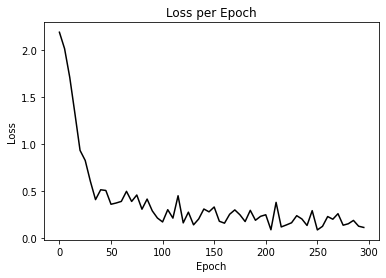

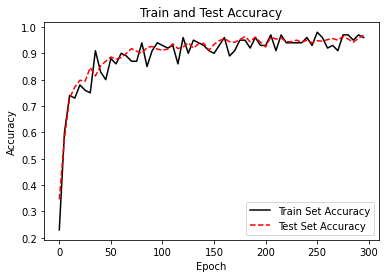

In [16]:
# Matlotlib code to plot the loss and accuracy
eval_indices = range(0, epochs, eval_every)
# Plot loss over time
plt.plot(eval_indices, train_loss, 'k-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
# Plot train and test accuracy
plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show() 


The bottom graph is the train and test set accuracy across 300 training epochs and the top plot is the softmax loss value over 300 epochs.

If we want to plot a sample of the lastest batch result we can plot it.

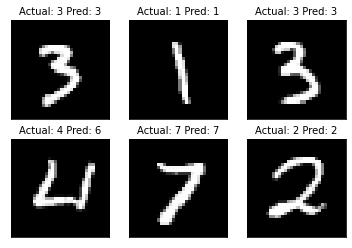

In [17]:
# Plot some samples and their predictions
actuals = y_test[30:36]
preds = model.predict(x_test[30:36])
predictions = np.argmax(preds,axis=1)
images = np.squeeze(x_test[30:36])
Nrows = 2
Ncols = 3
for i in range(6):
    plt.subplot(Nrows, Ncols, i+1)
    plt.imshow(np.reshape(images[i], [32,32]), cmap='Greys_r')
    plt.title('Actual: ' + str(actuals[i]) + ' Pred: ' + str(predictions[i]),
                               fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
plt.show() 


As can be seen from the above result, we did build successfully a simple CNN model which has a good result in accuracy and loss for this project.